# Tensor

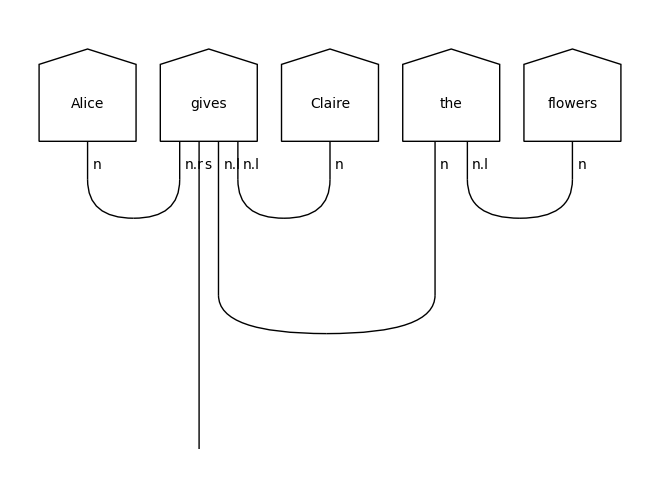

In [1]:
from lambeq import BobcatParser

parser = BobcatParser()
diagram = parser.sentence2diagram('Alice gives Claire the flowers')
diagram.draw()

In [2]:
from lambeq import AtomicType, MPSAnsatz, SpiderAnsatz, TensorAnsatz
from lambeq.backend.tensor import Dim

N = AtomicType.NOUN
S = AtomicType.SENTENCE

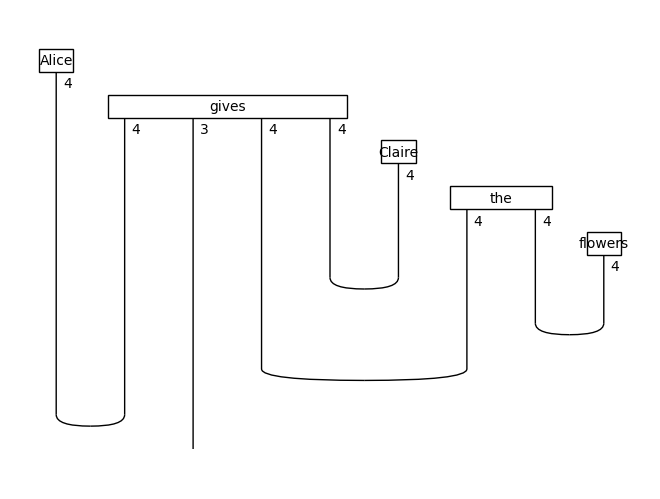

In [3]:
TensorAnsatz({N: Dim(4), S: Dim(3)})(diagram).draw()

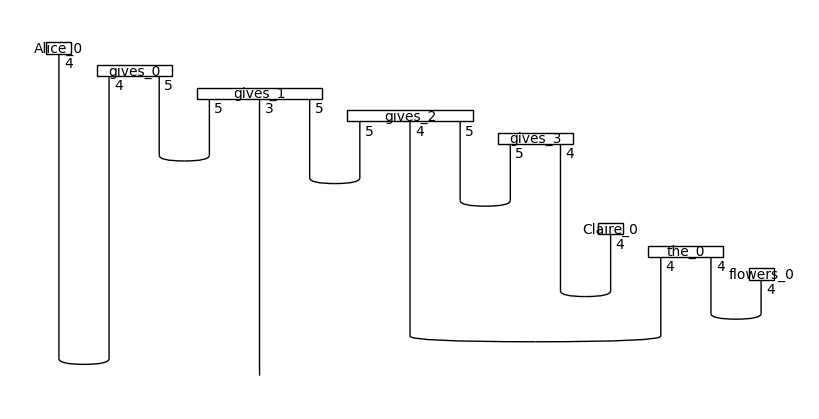

In [4]:
MPSAnsatz({N: Dim(4), S: Dim(3)}, bond_dim=5)(diagram).draw(figsize=(8, 4))

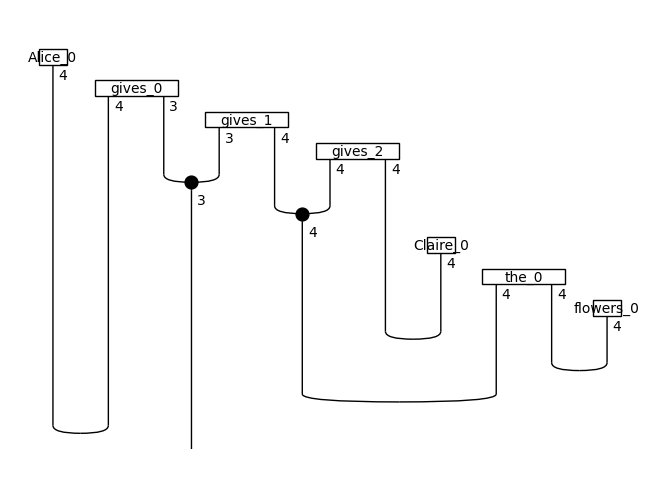

In [5]:
SpiderAnsatz({N: Dim(4), S: Dim(3)})(diagram).draw()

In [6]:
import torch as th
from sympy import default_sort_key

d = SpiderAnsatz({N: Dim(4), S: Dim(3)}, max_order=2)(diagram)

syms = sorted(d.free_symbols, key=default_sort_key)
sym_dict = {k: th.ones(k.size) for k in syms}
subbed_diagram = d.lambdify(*syms)(*sym_dict.values())

In [7]:
import tensornetwork as tn
subbed_diagram.eval(contractor=tn.contractors.auto)

array([256., 256., 256.], dtype=float32)